**Input:** </br>
df_provider_preprocessed, </br>
hospenc_index_train/test/val,</br>
df_master_preprocessed</br>
df_feats_clinical</br>
**Output:** </br>
ppg_graph_train/train_val/train_val_test </br>
df_feats_ppg_graph_train/val/test </br>

In [1]:
from utilities import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_feats_clinical=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_clinical.pkl','rb'))
df_master_preprocessed=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/df_master_preprocessed.pkl','rb'))
df_provider_preprocessed=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/df_provider_preprocessed.pkl','rb'))

In [4]:
df_master_index_all=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/split_index/df_master_index_all.pkl','rb'))

df_master_index_train=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/split_index/df_master_index_train.pkl','rb'))
df_master_index_val=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/split_index/df_master_index_val.pkl','rb'))
df_master_index_test=pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/split_index/df_master_index_test.pkl','rb'))

In [5]:
df_master_index_train_val=pd.concat([df_master_index_train,df_master_index_val])

In [6]:
df_master_index_train_val.shape[0]-df_master_index_train.shape[0]-df_master_index_val.shape[0]

0

In [7]:
df_provider_preprocessed_train = df_provider_preprocessed.loc[df_provider_preprocessed['CASE_NUMBER'].isin(df_master_index_train['CASE_NUMBER'])].reset_index(drop=True)
df_provider_preprocessed_train_val = df_provider_preprocessed.loc[df_provider_preprocessed['CASE_NUMBER'].isin(df_master_index_train_val['CASE_NUMBER'])].reset_index(drop=True)

In [8]:
df_provider_preprocessed_train.shape,df_provider_preprocessed_train_val.shape

((1344250, 6), (1539741, 6))

In [9]:
#######
df_master_preprocessed_check_encounter_RNN = df_master_preprocessed.groupby('ENCRYPTED_HOSP_ENCOUNTER').\
                                                                    agg({'ENCRYPTED_ENCOUNTER':'size'}).reset_index()

In [10]:
df_master_preprocessed_check_encounter_RNN.columns

Index(['ENCRYPTED_HOSP_ENCOUNTER', 'ENCRYPTED_ENCOUNTER'], dtype='object')

In [11]:
dist_enc = df_master_preprocessed_check_encounter_RNN.sort_values('ENCRYPTED_ENCOUNTER',ascending=False).reset_index().ENCRYPTED_ENCOUNTER

In [157]:
dist_enc

0         38
1         36
2         32
3         28
4         28
          ..
136642     1
136643     1
136644     1
136645     1
136646     1
Name: ENCRYPTED_ENCOUNTER, Length: 136647, dtype: int64

In [159]:
np.mean(dist_enc>1)

0.10427598117777924

In [160]:
print("quantiles from 0% to 100%,step 5%")
print([np.quantile(dist_enc,p) for p in np.arange(0,1.05,0.05)])
print("mean:",np.mean(dist_enc))
print("median:",np.median(dist_enc))
print(dist_enc.value_counts())

quantiles from 0% to 100%,step 5%
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 38.0]
mean: 1.1794550923181628
median: 1.0
1     122398
2       9714
3       2465
4        947
5        418
6        241
7        138
8         89
9         61
10        48
11        27
12        27
13        20
15         8
20         8
16         7
17         6
14         5
18         4
19         3
22         3
21         2
28         2
36         1
23         1
24         1
26         1
32         1
38         1
Name: ENCRYPTED_ENCOUNTER, dtype: int64


In [122]:
np.quantile(dist_enc,1) 

38

In [ ]:
[np.quantile(dist_enc,p) for p in np.arange(0,1,0.1)]

In [149]:
print(df_provider_preprocessed.columns)
df_provider_preprocessed.head()

Index(['CASE_DATE', 'ENCRYPTED_PROVIDER_NAME', 'BEGIN_Datetime',
       'END_Datetime', 'CASE_NUMBER', 'PROVIDER_TYPE'],
      dtype='object')


,CASE_DATE,ENCRYPTED_PROVIDER_NAME,BEGIN_Datetime,END_Datetime,CASE_NUMBER,PROVIDER_TYPE
0,3/23/2016,b'\x16\x1e9\x89B\x9b\x84=\xf2+\x0eza\xbfM6q\x8...,3/23/2016 7:59,3/23/2016 11:15,b'\x16{\xdd\xbd\xc4}a\xfc5\x12'3/23/2016,CIRCULATOR
1,3/23/2016,b'\x16\x03W=A\xef=\x82<v\xb0B\x96v\xe9\x8b\xac...,3/23/2016 7:59,NaN,b'\x16{\xdd\xbd\xc4}a\xfc5\x12'3/23/2016,Surgical Fellow/Resident
2,3/23/2016,"b'\x16\x05\xb9,\xea\x13""Di\x05\xa5\xe5+\x06\'`...",3/23/2016 7:08,3/23/2016 11:22,b'\x16{\xdd\xbd\xc4}a\xfc5\x12'3/23/2016,CRNA/AA/Resident
3,3/23/2016,b'\x16\x08q\x8d\x86\xb4)\x8f\xb8\xd0\xa3:\xeb\...,3/23/2016 9:53,3/23/2016 10:10,b'\x16{\xdd\xbd\xc4}a\xfc5\x12'3/23/2016,CRNA/AA/Resident
4,3/23/2016,"b""\x16\r\x85\xb5'L\xf9k\xc9m\x04\xf3\xc26\x9d\...",3/23/2016 7:59,3/23/2016 11:15,b'\x16{\xdd\xbd\xc4}a\xfc5\x12'3/23/2016,SURGICAL TECH


In [148]:
print(df_provider_preprocessed.columns)
df_master_preprocessed.head()

Index(['CASE_DATE', 'ENCRYPTED_PROVIDER_NAME', 'BEGIN_Datetime',
       'END_Datetime', 'CASE_NUMBER', 'PROVIDER_TYPE'],
      dtype='object')


,ENCRYPTED_ENCOUNTER,ENCRYPTED_MRN,ENCRYPTED_HOSP_ENCOUNTER,Case Date,Induction Datetime,Emergence Datetime,Dischg Date,Anesthesia Start Datetime,Anesthesia Stop Datetime,Anes Block Start Datetime,...,Admit BMI,CASE_NUMBER,death_date_final,IF_died,IF_died_prior_dischg,Surgery_End_Datetime,Death_surgery_span30d,Death_surgery_span90d,IF_died_postsurg30d,IF_died_postsurg90d
0,b'\x16\x7f\x17:\xdeX[\xb4\xf3\x80.\xaa\xd6OU',"b""\x16}'\xd7\xee\xa8\xdb\xd4\x18\x9f""",b'\x16\x7f\x17:\xdeX[\xb4\xf3\x80.\xaa\xd6OU',1/1/2011,NaN,NaN,2011-01-12,1/1/2011 14:23,NaN,NaN,...,24.946795,b'\x16}&\xf4\xa2\xfe1i\xc7 '1/1/2011,2014-09-11,1,0,2011-01-01 17:06:00,2011-01-31 17:06:00,2011-04-01 17:06:00,0,0
1,b'\x16\x7f\x17:\xdeXZ}\xcf=\xe5\x1a.w$',b'\x16\x7f\x14\xdcx\xd8\xb5\x08\xaes\x81',b'\x16\x7f\x17:\xdeXZ}\xcf=\xe5\x1a.w$',1/1/2011,NaN,NaN,2011-01-04,1/1/2011 15:20,NaN,NaN,...,18.990905,b'\x16}&\xf4\xa3\xe13R\x89\x90'1/1/2011,NaT,0,0,2011-01-01 17:02:00,2011-01-31 17:02:00,2011-04-01 17:02:00,0,0
2,b'\x16\x7f\x17:\xdeXZ}\xcf=\xe6\xd2\xa1\xe6\xdd',b'\x16w\xc3\xaaqi$\xd9\x07m',b'\x16\x7f\x17:\xdeXZ}\xcf=\xe6\xd2\xa1\xe6\xdd',1/1/2011,NaN,NaN,2011-01-03,1/1/2011 11:46,NaN,NaN,...,23.043067,b'\x16}&\xf4\xa3\xe1=-\xda\xc3'1/1/2011,NaT,0,0,2011-01-01 12:49:00,2011-01-31 12:49:00,2011-04-01 12:49:00,0,0
3,b'\x16\x7f\x17:\xdeXZ}\xc3sQ\xd3\xb9Y\x0f',b'\x16\x7f\x11\xb9\xc9\xe5\x9dR3\x8c6',b'\x16\x7f\x17:\xdeXZ}\xc3sQ\xd3\xb9Y\x0f',1/1/2011,NaN,NaN,2011-01-06,1/1/2011 20:26,NaN,NaN,...,25.719438,b'\x16}&\xf4\xa2\xff\x9c\xe1W\x14'1/1/2011,NaT,0,0,2011-01-01 22:59:00,2011-01-31 22:59:00,2011-04-01 22:59:00,0,0
4,b'\x16\x7f\x17:\xdeXZ}\xcf>%n\x11!V',b'\x16y\xbc\x96[\x87\xf5Ll]',b'\x16\x7f\x17:\xdeXZ}\xcf>%n\x11!V',1/1/2011,NaN,NaN,2011-01-04,1/1/2011 8:35,NaN,NaN,...,21.285726,b'\x16}&\xf4\xa3\xe16!\x99\x86'1/1/2011,2019-10-30,1,0,2011-01-01 11:16:00,2011-01-31 11:16:00,2011-04-01 11:16:00,0,0


# Graph 1: entire

In [10]:
df_provider_specialty_all = df_provider_preprocessed[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']]

# #### Node, Edge, Attribute Creation
nodes_all = set(df_provider_preprocessed['ENCRYPTED_PROVIDER_NAME'])
edges_all = dict()
attrs_all = dict() 

for values in list(df_provider_specialty_all.values):
    node_id = values[0]
    specialty_all = values[1] 
    attrs_all[node_id] = {"label":specialty_all}
    
for ori in nodes_all:
    edges_all[ori] = dict()


# #### Edge weight calculation
for case_index in tqdm(list(set(df_provider_preprocessed['CASE_NUMBER']))):
    list_providers = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'] == case_index]["ENCRYPTED_PROVIDER_NAME"])

    tmp_providers = list_providers
    for provider_ori in list_providers:
        tmp_providers.remove(provider_ori)
        for provider_des in tmp_providers:
            if provider_ori == provider_des:continue
            if provider_des in edges_all[provider_ori]:
                edges_all[provider_ori][provider_des] +=1
            else:
                edges_all[provider_ori].setdefault(provider_des,1)



# #### Graph Construction
PPG_all = nx.Graph()

for ori, array in edges_all.items():
    for des, value in array.items():
        PPG_all.add_edge(ori, des, weight=value)

nx.set_node_attributes(PPG_all, attrs_all)

100%|█████████████████████████████████| 161748/161748 [9:23:48<00:00,  4.78it/s]


In [11]:
node_missed = df_provider_preprocessed.loc[~df_provider_preprocessed["ENCRYPTED_PROVIDER_NAME"].isin(PPG_all.nodes)][["ENCRYPTED_PROVIDER_NAME","PROVIDER_TYPE"]].drop_duplicates(ignore_index=True)

In [12]:
node_missed

,ENCRYPTED_PROVIDER_NAME,PROVIDER_TYPE
0,b'\x16\x00JK\xb9<',Missing Role


In [13]:
for index, row in node_missed.iterrows():
    PPG_all.add_node(row['ENCRYPTED_PROVIDER_NAME'],label=row['PROVIDER_TYPE'])

In [14]:
# #### Graph Order
g_order_all = nx.number_of_nodes(PPG_all)


# #### Graph Size
g_size_all = nx.number_of_edges(PPG_all)


# #### Graph Density
g_density_all = nx.density(PPG_all)

# #### Graph Degree
dg_dict_all = PPG_all.degree(weight='weight')

# #### Degree centrality
dc_dict_all = nx.degree_centrality(PPG_all)

# #### Closeness centrality
cc_dict_all = nx.closeness_centrality(PPG_all)

# #### harmonic centrality
hc_dict_all = nx.harmonic_centrality(PPG_all)


# #### Betweenness centrality
bc_dict_all = nx.betweenness_centrality(PPG_all,weight='weight')

# #### Eigenvector centrality
ec_dict_all = nx.eigenvector_centrality(PPG_all,weight='weight')

# ### hub and authoritiestrain
hub_dict_all, autho_dict_all = nx.hits(PPG_all)

# ### page rank
prank_dict_all = nx.pagerank(PPG_all,weight='weight')

# ### clustering coef
clustcoef_dict_all = nx.clustering(PPG_all,weight='weight')

# ###knn
nodes_all = dict(PPG_all.nodes)
knn_dict_all = {k: list(nx.k_nearest_neighbors(PPG_all,nodes=k,weight='weight').values())[0] for k, v in nodes_all.items()}

community = np.array(nx_comm.louvain_communities(PPG_all, seed=2022,weight='weight'))
com_dict_all = {k: my_find_community(k=k,com=np.array(community)) for k, v in nodes_all.items()}

In [15]:
community_cols_all = []
for ind, _ in enumerate(community):
    community_cols_all.append('community'+str(ind+1))
community_cols_all

['community1',
 'community2',
 'community3',
 'community4',
 'community5',
 'community6',
 'community7',
 'community8']

In [16]:
dg_list_all = sorted(dict(dg_dict_all).items(), key=lambda item: item[1],reverse=True)

dc_list_all = sorted(dc_dict_all.items(), key=lambda item: item[1],reverse=True)

cc_list_all = sorted(cc_dict_all.items(), key=lambda item: item[1],reverse=True)

hc_list_all = sorted(hc_dict_all.items(), key=lambda item: item[1],reverse=True)


bc_list_all = sorted(bc_dict_all.items(), key=lambda item: item[1],reverse=True)


ec_list_all = sorted(ec_dict_all.items(), key=lambda item: item[1],reverse=True)


graph_metrics_all = {
    "node_num":g_order_all,
    "edge_num":g_size_all,
    "density":round(g_density_all, 4),
    "max_degree":dg_list_all[0][-1],
    "min_degree":dg_list_all[-1][-1],
    "max_degree_centrality": round(dc_list_all[0][-1], 4) ,
    "min_degree_centrality": round(dc_list_all[-1][-1], 4),
    "max_closeness_centrality": round(cc_list_all[0][-1], 4),
    "min_closeness_centrality": round(cc_list_all[-1][-1], 4),
    "max_harmonic_centrality": hc_list_all[0][-1],
    "min_harmonic_centrality": hc_list_all[-1][-1],
    "max_betweenness_centrality": round(bc_list_all[0][-1], 4),
    "min_betweenness_centrality": round(bc_list_all[-1][-1], 4),
    "max_eigenvector_centrality": round(ec_list_all[0][-1], 4),
    "min_eigenvector_centrality": round(ec_list_all[-1][-1], 4),
}

with open("/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/graph_statistics_all.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for key,val in graph_metrics_all.items():
        writer.writerow((key,val))
graph_metrics_all

{'node_num': 5788,
 'edge_num': 1126748,
 'density': 0.0673,
 'max_degree': 24508,
 'min_degree': 0,
 'max_degree_centrality': 0.5187,
 'min_degree_centrality': 0.0,
 'max_closeness_centrality': 0.675,
 'min_closeness_centrality': 0.0,
 'max_harmonic_centrality': 4394.0,
 'min_harmonic_centrality': 0,
 'max_betweenness_centrality': 0.0086,
 'min_betweenness_centrality': 0.0,
 'max_eigenvector_centrality': 0.1391,
 'min_eigenvector_centrality': 0.0}

In [17]:
pickle.dump(PPG_all,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/PPG_all.pkl','wb'))

In [12]:
PPG_all = pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/PPG_all.pkl','rb'))

In [13]:
case_numbers = set(df_master_index_all['CASE_NUMBER'])
from random import sample
case_numbers_subgraph = sample(case_numbers,100)

In [14]:
df_provider_subgraph = df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].isin(case_numbers_subgraph)]
df_provider_specialty_subgraph = df_provider_subgraph[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']]

In [15]:
# #### Node, Edge, Attribute Creation
nodes_sub = set(df_provider_specialty_subgraph['ENCRYPTED_PROVIDER_NAME'])
edges_sub = dict()
attrs_sub = dict() 

for values in list(df_provider_specialty_subgraph.values):
    node_id_sub = values[0]
    specialty_sub = values[1] 
    attrs_sub[node_id_sub] = {"label":specialty_sub}
    
for ori in nodes_sub:
    edges_sub[ori] = dict()


# #### Edge weight calculation
for case_index in tqdm(list(set(df_provider_subgraph['CASE_NUMBER']))):
    list_providers = list(df_provider_subgraph[df_provider_subgraph['CASE_NUMBER'] == case_index]["ENCRYPTED_PROVIDER_NAME"])
    #print(len(list_providers))
    #count = 0
    tmp_providers = list_providers
    for provider_ori in list_providers:
        tmp_providers.remove(provider_ori)
        for provider_des in tmp_providers:
            if provider_ori == provider_des:continue
            if provider_des in edges_sub[provider_ori]:
                edges_sub[provider_ori][provider_des] +=1
            else:
                edges_sub[provider_ori].setdefault(provider_des,1)
            #count +=1
    #print(count)


# #### Graph Construction
PPG_sub = nx.Graph()

for ori, array in edges_sub.items():
    for des, value in array.items():
        PPG_sub.add_edge(ori, des, weight=value)

PPG_degree_sub = dict(PPG_sub.degree)
PPG_edges_sub = PPG_sub.edges()
weights_sub = [PPG_sub[u][v]['weight']*0.1 for u,v in PPG_edges_sub]
nx.set_node_attributes(PPG_sub, attrs_sub)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2995.59it/s]


In [16]:
labels = nx.get_node_attributes(PPG_sub, 'label') 
labels = pd.DataFrame(labels,index=['provider_type']).transpose().reset_index()
labels=labels.rename(columns={"index": "provider_name"})
labels['col_value']=pd.Categorical(labels['provider_type'])
labels['col_value']=labels['col_value'].cat.codes
labels_agg=labels.groupby(['provider_type','col_value']).count().reset_index().sort_values('provider_name',ascending=False)

In [17]:
#total number of provider types
maxval = len(labels_agg)
maxval_weights = max(weights_sub)-min(weights_sub)


# get colormap
cmap=plt.cm.Spectral

0.2581988897471611


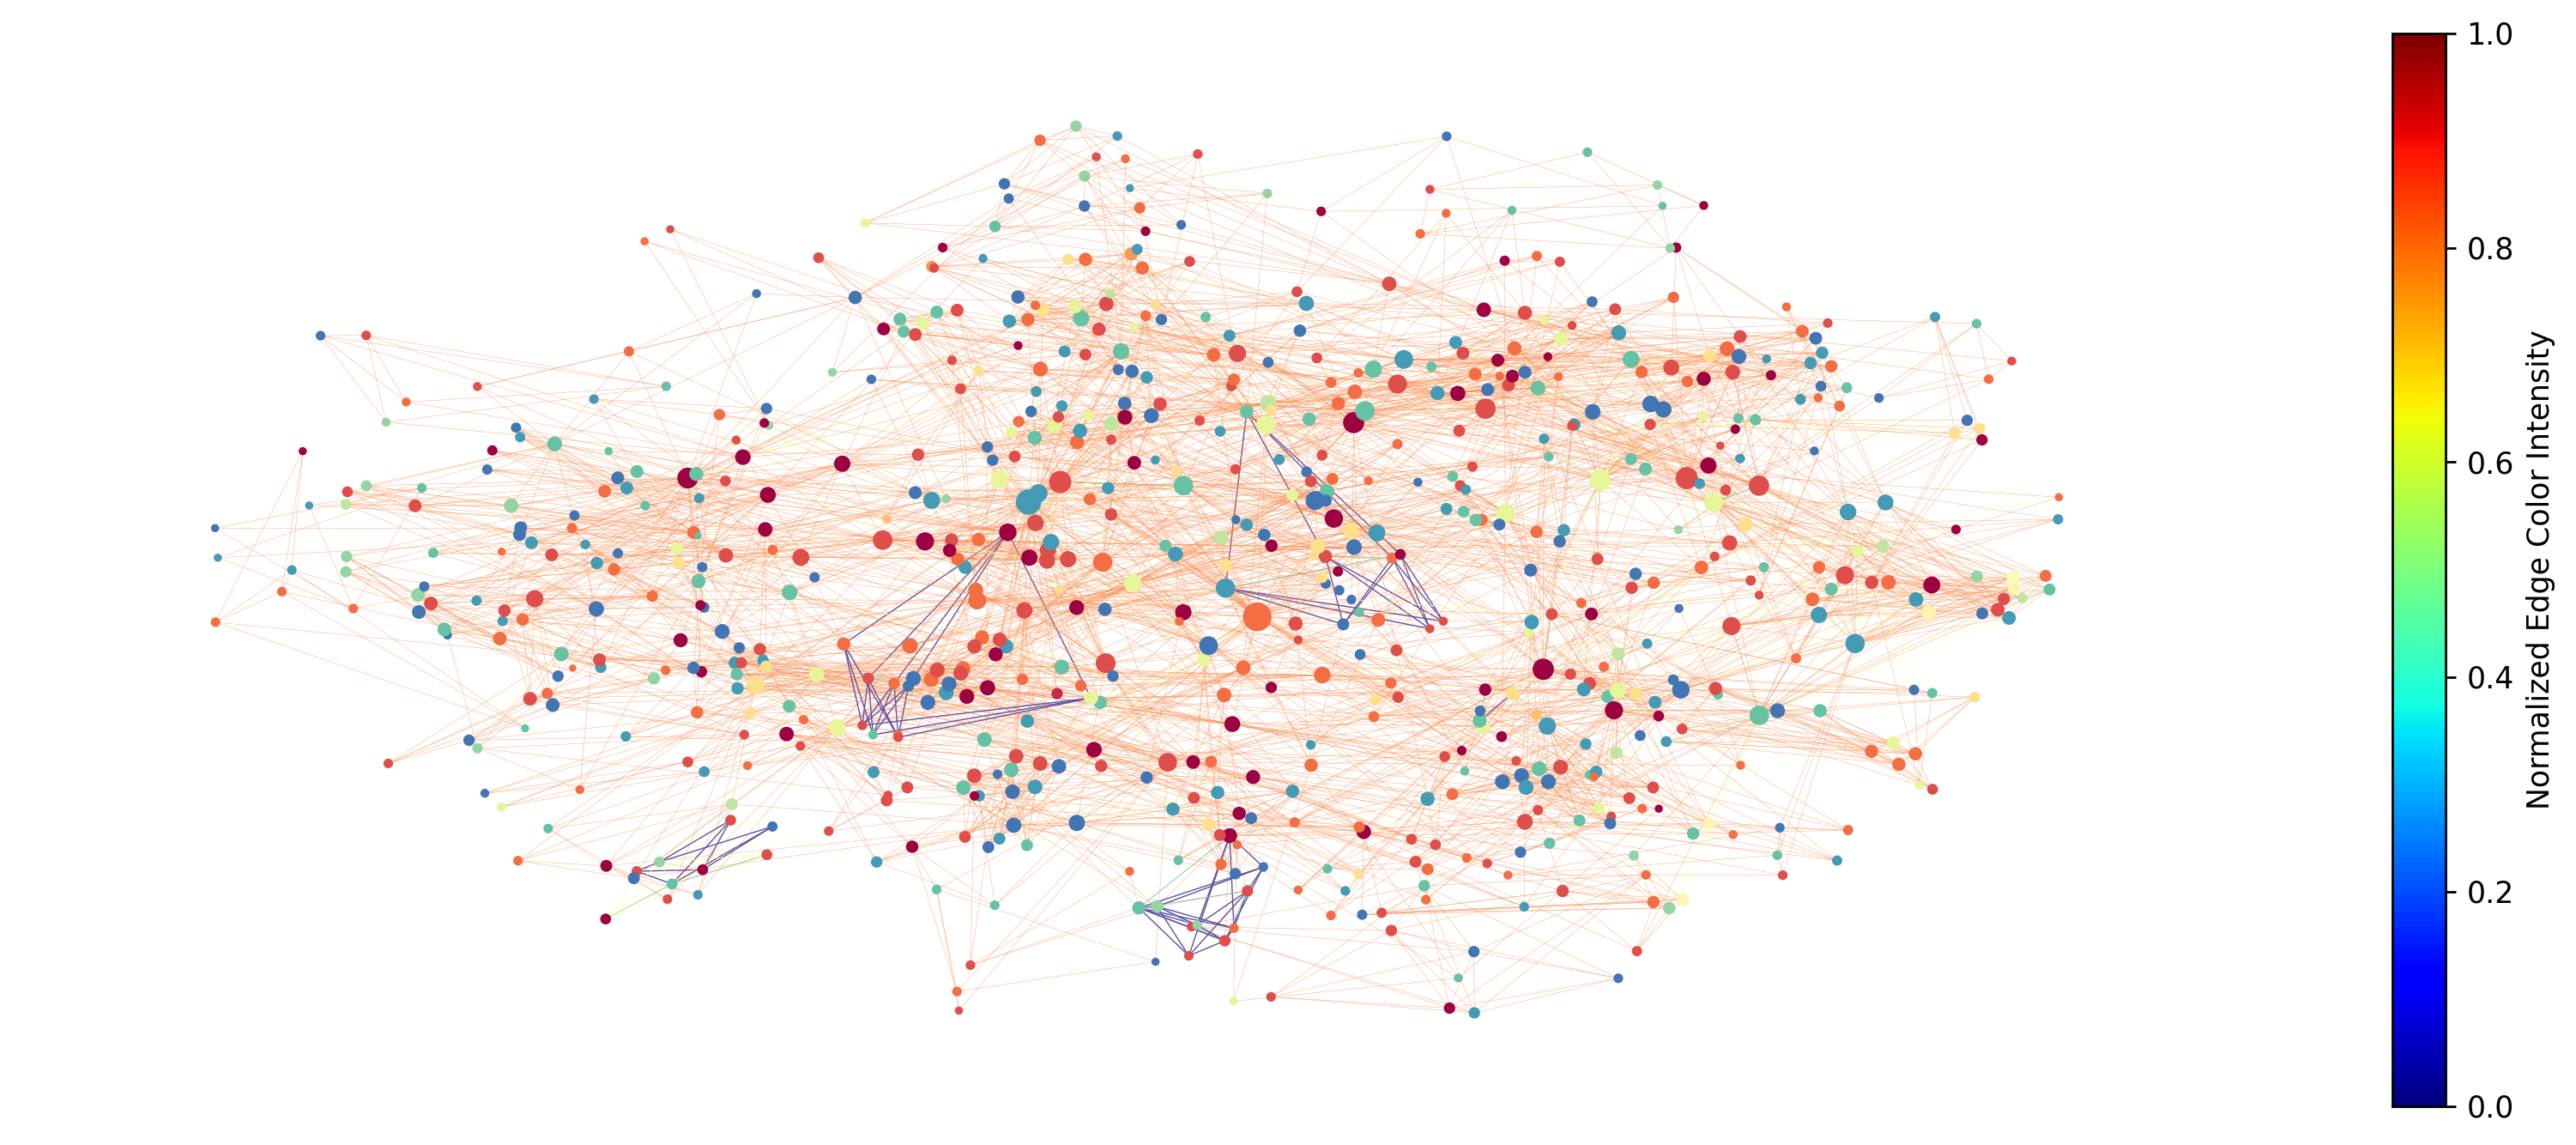

In [21]:
plt.figure(1,figsize=(13,5),dpi=250) 
np.random.seed(666)

#layout style: Position nodes using Fruchterman-Reingold force-directed algorithm.
#The algorithm simulates a force-directed representation of the network treating edges as springs #holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity #force. Simulation continues until the positions are close to an equilibrium.
optimal_k = 1/np.sqrt(len(labels_agg))
print(optimal_k)
pos = nx.spring_layout(PPG_sub,k=optimal_k*1)


#layout style: circular
#pos = nx.circular_layout(PPG)


#plt.title("Provider-Provider Network \n Edge Width&Color: number of interactions \n Node Color: provider type  \n Node Size: Degree\n#layout style: Position nodes using Fruchterman-Reingold force-directed algorithm.")
plt.set_cmap('jet')
nx.draw(PPG_sub,pos,
        font_size = 10,
        node_color=[cmap(v/maxval) for v in labels['col_value']],
      #  verticalalignment='top', 
        node_size=[v *1 for v in PPG_degree_sub.values()], 
      #  node_shape='s',
        edge_color=[cmap(v/maxval_weights) for v in weights_sub],
	width=weights_sub
       )
# make empty plot with correct color and label for each group
for index, row in labels_agg.iterrows():
    plt.scatter([],[], c=[cmap(row['col_value']/maxval)], label=row['provider_type']+' ('+str(row['provider_name'])+')')
cbar = plt.colorbar()
cbar.set_label('Normalized Edge Color Intensity')

#plt.legend(loc='upper right',prop={'size': 8})
#plt.legend(loc='best')
plt.show()

## train feat 1

In [62]:
str_append_std = "num_edges_weighted,\
               num_provider,\
               num_uniq_provider,\
               num_provider_type,\
               num_uniq_provider_type,\
               bc_node_max,\
                bc_node_min,\
                bc_node_avg,\
                bc_node_iqr,\
                dc_node_max,\
                dc_node_min,\
                dc_node_avg,\
                dc_node_iqr,\
                ec_node_max,\
                ec_node_min,\
                ec_node_avg,\
                ec_node_iqr,\
                hc_node_max,\
                hc_node_min,\
                hc_node_avg,\
                hc_node_iqr,\
                cc_node_max,\
                cc_node_min,\
                cc_node_avg,\
                cc_node_iqr,\
                knn_node_max,\
                knn_node_min,\
                knn_node_avg,\
                knn_node_iqr,\
                clustcoef_node_max,\
                clustcoef_node_min,\
                clustcoef_node_avg,\
                clustcoef_node_iqr,\
                prank_node_max,\
                prank_node_min,\
                prank_node_avg,\
                prank_node_iqr,\
                autho_node_max,\
                autho_node_min,\
                autho_node_avg,\
                autho_node_iqr,\
                hub_node_max,\
                hub_node_min,\
                hub_node_avg,\
                hub_node_iqr, \
                dg_node_max,\
                dg_node_min,\
                dg_node_avg,\
                dg_node_iqr"
for col in community_cols_all:
        exec("str_append_std = 'count_'+col+','+str_append_std")

In [63]:
#here
hospenc_id = []
grapic_features_ppg_train_all = []
for hosp_id in tqdm(df_master_index_train['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values):

    relavant_case_id = df_master_index_train.\
                        loc[df_master_index_train['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id]['CASE_NUMBER'].\
                        drop_duplicates().values
    relevant_provider_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["ENCRYPTED_PROVIDER_NAME"])
    
    #1.degree
    dg_node_metric_list = get_graph_metrics_list(relevant_provider_list, dg_dict_all)
    if len(dg_node_metric_list) ==0: 
        dg_node_metric_list=[0]
    
    dg_node_max = np.amax(dg_node_metric_list, axis=0)
    dg_node_min = np.amin(dg_node_metric_list, axis=0)
    dg_node_avg = np.average(dg_node_metric_list, axis=0)
    dg_node_iqr = iqr_calculator(dg_node_metric_list)
    
    #2.hub
    hub_node_metric_list = get_graph_metrics_list(relevant_provider_list, hub_dict_all)
    if len(hub_node_metric_list) ==0: 
        hub_node_metric_list=[0]
    
    hub_node_max = np.amax(hub_node_metric_list, axis=0)
    hub_node_min = np.amin(hub_node_metric_list, axis=0)
    hub_node_avg = np.average(hub_node_metric_list, axis=0)
    hub_node_iqr = iqr_calculator(hub_node_metric_list)
    
    #3.authority
    autho_node_metric_list = get_graph_metrics_list(relevant_provider_list, autho_dict_all)
    if len(autho_node_metric_list) ==0: 
        autho_node_metric_list=[0]
    
    autho_node_max = np.amax(autho_node_metric_list, axis=0)
    autho_node_min = np.amin(autho_node_metric_list, axis=0)
    autho_node_avg = np.average(autho_node_metric_list, axis=0)
    autho_node_iqr = iqr_calculator(autho_node_metric_list)
    
    #4.page rank
    prank_node_metric_list = get_graph_metrics_list(relevant_provider_list, prank_dict_all)
    if len(prank_node_metric_list) ==0: 
        prank_node_metric_list=[0]
    
    prank_node_max = np.amax(prank_node_metric_list, axis=0)
    prank_node_min = np.amin(prank_node_metric_list, axis=0)
    prank_node_avg = np.average(prank_node_metric_list, axis=0)
    prank_node_iqr = iqr_calculator(prank_node_metric_list)
    
    #5.clustering coefficient
    clustcoef_node_metric_list = get_graph_metrics_list(relevant_provider_list, clustcoef_dict_all)
    if len(clustcoef_node_metric_list) ==0: 
        clustcoef_node_metric_list=[0]
    
    clustcoef_node_max = np.amax(clustcoef_node_metric_list, axis=0)
    clustcoef_node_min = np.amin(clustcoef_node_metric_list, axis=0)
    clustcoef_node_avg = np.average(clustcoef_node_metric_list, axis=0)
    clustcoef_node_iqr = iqr_calculator(clustcoef_node_metric_list)
    
    #6.community class
    comm_node_metric_list = get_graph_metrics_list(relevant_provider_list, com_dict_all)
    if len(comm_node_metric_list) ==0: 
        comm_node_metric_list=[0]
    
    for col in community_cols_all:
        exec('count_'+col+' = np.sum(comm_node_metric_list=="'+col+'")')
    
    #7.knn
    knn_node_metric_list = get_graph_metrics_list(relevant_provider_list, knn_dict_all)
    if len(knn_node_metric_list) ==0: 
        knn_node_metric_list=[0]
    
    knn_node_max = np.amax(knn_node_metric_list, axis=0)
    knn_node_min = np.amin(knn_node_metric_list, axis=0)
    knn_node_avg = np.average(knn_node_metric_list, axis=0)
    knn_node_iqr = iqr_calculator(knn_node_metric_list)
    
    #8.closeness centrality
    cc_node_metric_list = get_graph_metrics_list(relevant_provider_list, cc_dict_all)
    if len(cc_node_metric_list) ==0: 
        cc_node_metric_list=[0]
    
    cc_node_max = np.amax(cc_node_metric_list, axis=0)
    cc_node_min = np.amin(cc_node_metric_list, axis=0)
    cc_node_avg = np.average(cc_node_metric_list, axis=0)
    cc_node_iqr = iqr_calculator(cc_node_metric_list)
    
    #9.betweeness centrality
    bc_node_metric_list = get_graph_metrics_list(relevant_provider_list, bc_dict_all)
    if len(bc_node_metric_list) ==0: 
        bc_node_metric_list=[0]
    
    bc_node_max = np.amax(bc_node_metric_list, axis=0)
    bc_node_min = np.amin(bc_node_metric_list, axis=0)
    bc_node_avg = np.average(bc_node_metric_list, axis=0)
    bc_node_iqr = iqr_calculator(bc_node_metric_list)
     
    #10.degree centrality
    dc_node_metric_list = get_graph_metrics_list(relevant_provider_list, dc_dict_all)
    if len(dc_node_metric_list) ==0: 
        dc_node_metric_list=[0]
 
    dc_node_max = np.amax(dc_node_metric_list, axis=0)
    dc_node_min = np.amin(dc_node_metric_list, axis=0)
    dc_node_avg = np.average(dc_node_metric_list, axis=0)
    dc_node_iqr = iqr_calculator(dc_node_metric_list)
    
    #11.eigenvalue centrality
    ec_node_metric_list = get_graph_metrics_list(relevant_provider_list, ec_dict_all)
    if len(ec_node_metric_list) ==0: 
        ec_node_metric_list=[0]
        
    ec_node_max = np.amax(ec_node_metric_list, axis=0)
    ec_node_min = np.amin(ec_node_metric_list, axis=0)
    ec_node_avg = np.average(ec_node_metric_list, axis=0)
    ec_node_iqr = iqr_calculator(ec_node_metric_list)
    
    #12.harmonic centrality
    hc_node_metric_list = get_graph_metrics_list(relevant_provider_list, hc_dict_all)
    if len(hc_node_metric_list) ==0: 
        hc_node_metric_list=[0]
    
    hc_node_max = np.amax(hc_node_metric_list, axis=0)
    hc_node_min = np.amin(hc_node_metric_list, axis=0)
    hc_node_avg = np.average(hc_node_metric_list, axis=0)
    hc_node_iqr = iqr_calculator(hc_node_metric_list)
    
    #13.number of providers
    num_provider = len(np.array(relevant_provider_list))
    relevant_provider_set = set(relevant_provider_list)
    num_uniq_provider = len(np.array(list(relevant_provider_set)))
    
    #14.number of provider types
    relevant_type_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["PROVIDER_TYPE"])
    
    num_provider_type = len(np.array(relevant_type_list))
    relevant_type_set = set(relevant_type_list)
    num_uniq_provider_type = len(np.array(list(relevant_type_set)))
    
    #15. size/num_edges of subgraph weighted
    num_edges_weighted = PPG_all.subgraph(list(relevant_provider_set)).size(weight='weight')
    
    hospenc_id.append(hosp_id)
    
    exec("grapic_features_ppg_train_all.append(["+str_append_std+"])")
   

100%|█████████████████████████████████| 109318/109318 [2:32:40<00:00, 11.93it/s]


In [64]:
str_colnames_std = str("'num_edges_weighted',\
                    'num_provider',\
                    'num_uniq_provider',\
                    'num_provider_type',\
                    'num_uniq_provider_type',\
                    'bc_node_max',\
                    'bc_node_min',\
                    'bc_node_avg',\
                    'bc_node_iqr',\
                    'dc_node_max',\
                    'dc_node_min',\
                    'dc_node_avg',\
                    'dc_node_iqr',\
                    'ec_node_max',\
                    'ec_node_min',\
                    'ec_node_avg',\
                    'ec_node_iqr',\
                    'hc_node_max',\
                    'hc_node_min',\
                    'hc_node_avg',\
                    'hc_node_iqr',\
                    'cc_node_max',\
                    'cc_node_min',\
                    'cc_node_avg',\
                    'cc_node_iqr',\
                    'knn_node_max',\
                    'knn_node_min',\
                    'knn_node_avg',\
                    'knn_node_iqr', \
                    'clustcoef_node_max',\
                    'clustcoef_node_min',\
                    'clustcoef_node_avg',\
                    'clustcoef_node_iqr', \
                    'prank_node_max',\
                    'prank_node_min',\
                    'prank_node_avg',\
                    'prank_node_iqr', \
                    'autho_node_max',\
                    'autho_node_min',\
                    'autho_node_avg',\
                    'autho_node_iqr', \
                    'hub_node_max',\
                    'hub_node_min',\
                    'hub_node_avg',\
                    'hub_node_iqr',\
                    'dg_node_max',\
                    'dg_node_min',\
                    'dg_node_avg',\
                    'dg_node_iqr'")
for col in community_cols_all:
    col_tmp = "count_"+col
    str_colnames_std = "'count_"+col+"',"+str_colnames_std
grapic_features_ppg_train_all_pd = pd.DataFrame(grapic_features_ppg_train_all)
exec("grapic_features_ppg_train_all_pd.columns=["+str_colnames_std+"]")

hospenc_enc_indx = pd.DataFrame(hospenc_id,columns=["ENCRYPTED_HOSP_ENCOUNTER"])
df_feats_ppg_train_all = pd.concat([hospenc_enc_indx,grapic_features_ppg_train_all_pd],axis=1)

In [67]:
df_feats_ppg_train_all.shape
pickle.dump(df_feats_ppg_train_all,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_ppg_train_all.pkl','wb'))

(109318, 57)

## val feat 1

In [69]:
str_append_std = "num_edges_weighted,\
               num_provider,\
               num_uniq_provider,\
               num_provider_type,\
               num_uniq_provider_type,\
               bc_node_max,\
                bc_node_min,\
                bc_node_avg,\
                bc_node_iqr,\
                dc_node_max,\
                dc_node_min,\
                dc_node_avg,\
                dc_node_iqr,\
                ec_node_max,\
                ec_node_min,\
                ec_node_avg,\
                ec_node_iqr,\
                hc_node_max,\
                hc_node_min,\
                hc_node_avg,\
                hc_node_iqr,\
                cc_node_max,\
                cc_node_min,\
                cc_node_avg,\
                cc_node_iqr,\
                knn_node_max,\
                knn_node_min,\
                knn_node_avg,\
                knn_node_iqr,\
                clustcoef_node_max,\
                clustcoef_node_min,\
                clustcoef_node_avg,\
                clustcoef_node_iqr,\
                prank_node_max,\
                prank_node_min,\
                prank_node_avg,\
                prank_node_iqr,\
                autho_node_max,\
                autho_node_min,\
                autho_node_avg,\
                autho_node_iqr,\
                hub_node_max,\
                hub_node_min,\
                hub_node_avg,\
                hub_node_iqr, \
                dg_node_max,\
                dg_node_min,\
                dg_node_avg,\
                dg_node_iqr"
for col in community_cols_all:
        exec("str_append_std = 'count_'+col+','+str_append_std")

In [70]:
#here
hospenc_id = []
grapic_features_ppg_val = []
for hosp_id in tqdm(df_master_index_val['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values):

    relavant_case_id = df_master_index_val.\
                        loc[df_master_index_val['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id]['CASE_NUMBER'].\
                        drop_duplicates().values
    relevant_provider_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["ENCRYPTED_PROVIDER_NAME"])
    
    #1.degree
    dg_node_metric_list = get_graph_metrics_list(relevant_provider_list, dg_dict_all)
    if len(dg_node_metric_list) ==0: 
        dg_node_metric_list=[0]
    
    dg_node_max = np.amax(dg_node_metric_list, axis=0)
    dg_node_min = np.amin(dg_node_metric_list, axis=0)
    dg_node_avg = np.average(dg_node_metric_list, axis=0)
    dg_node_iqr = iqr_calculator(dg_node_metric_list)
    
    #2.hub
    hub_node_metric_list = get_graph_metrics_list(relevant_provider_list, hub_dict_all)
    if len(hub_node_metric_list) ==0: 
        hub_node_metric_list=[0]
    
    hub_node_max = np.amax(hub_node_metric_list, axis=0)
    hub_node_min = np.amin(hub_node_metric_list, axis=0)
    hub_node_avg = np.average(hub_node_metric_list, axis=0)
    hub_node_iqr = iqr_calculator(hub_node_metric_list)
    
    #3.authority
    autho_node_metric_list = get_graph_metrics_list(relevant_provider_list, autho_dict_all)
    if len(autho_node_metric_list) ==0: 
        autho_node_metric_list=[0]
    
    autho_node_max = np.amax(autho_node_metric_list, axis=0)
    autho_node_min = np.amin(autho_node_metric_list, axis=0)
    autho_node_avg = np.average(autho_node_metric_list, axis=0)
    autho_node_iqr = iqr_calculator(autho_node_metric_list)
    
    #4.page rank
    prank_node_metric_list = get_graph_metrics_list(relevant_provider_list, prank_dict_all)
    if len(prank_node_metric_list) ==0: 
        prank_node_metric_list=[0]
    
    prank_node_max = np.amax(prank_node_metric_list, axis=0)
    prank_node_min = np.amin(prank_node_metric_list, axis=0)
    prank_node_avg = np.average(prank_node_metric_list, axis=0)
    prank_node_iqr = iqr_calculator(prank_node_metric_list)
    
    #5.clustering coefficient
    clustcoef_node_metric_list = get_graph_metrics_list(relevant_provider_list, clustcoef_dict_all)
    if len(clustcoef_node_metric_list) ==0: 
        clustcoef_node_metric_list=[0]
    
    clustcoef_node_max = np.amax(clustcoef_node_metric_list, axis=0)
    clustcoef_node_min = np.amin(clustcoef_node_metric_list, axis=0)
    clustcoef_node_avg = np.average(clustcoef_node_metric_list, axis=0)
    clustcoef_node_iqr = iqr_calculator(clustcoef_node_metric_list)
    
    #6.community class
    comm_node_metric_list = get_graph_metrics_list(relevant_provider_list, com_dict_all)
    if len(comm_node_metric_list) ==0: 
        comm_node_metric_list=[0]
    
    for col in community_cols_all:
        exec('count_'+col+' = np.sum(comm_node_metric_list=="'+col+'")')
    
    #7.knn
    knn_node_metric_list = get_graph_metrics_list(relevant_provider_list, knn_dict_all)
    if len(knn_node_metric_list) ==0: 
        knn_node_metric_list=[0]
    
    knn_node_max = np.amax(knn_node_metric_list, axis=0)
    knn_node_min = np.amin(knn_node_metric_list, axis=0)
    knn_node_avg = np.average(knn_node_metric_list, axis=0)
    knn_node_iqr = iqr_calculator(knn_node_metric_list)
    
    #8.closeness centrality
    cc_node_metric_list = get_graph_metrics_list(relevant_provider_list, cc_dict_all)
    if len(cc_node_metric_list) ==0: 
        cc_node_metric_list=[0]
    
    cc_node_max = np.amax(cc_node_metric_list, axis=0)
    cc_node_min = np.amin(cc_node_metric_list, axis=0)
    cc_node_avg = np.average(cc_node_metric_list, axis=0)
    cc_node_iqr = iqr_calculator(cc_node_metric_list)
    
    #9.betweeness centrality
    bc_node_metric_list = get_graph_metrics_list(relevant_provider_list, bc_dict_all)
    if len(bc_node_metric_list) ==0: 
        bc_node_metric_list=[0]
    
    bc_node_max = np.amax(bc_node_metric_list, axis=0)
    bc_node_min = np.amin(bc_node_metric_list, axis=0)
    bc_node_avg = np.average(bc_node_metric_list, axis=0)
    bc_node_iqr = iqr_calculator(bc_node_metric_list)
     
    #10.degree centrality
    dc_node_metric_list = get_graph_metrics_list(relevant_provider_list, dc_dict_all)
    if len(dc_node_metric_list) ==0: 
        dc_node_metric_list=[0]
 
    dc_node_max = np.amax(dc_node_metric_list, axis=0)
    dc_node_min = np.amin(dc_node_metric_list, axis=0)
    dc_node_avg = np.average(dc_node_metric_list, axis=0)
    dc_node_iqr = iqr_calculator(dc_node_metric_list)
    
    #11.eigenvalue centrality
    ec_node_metric_list = get_graph_metrics_list(relevant_provider_list, ec_dict_all)
    if len(ec_node_metric_list) ==0: 
        ec_node_metric_list=[0]
        
    ec_node_max = np.amax(ec_node_metric_list, axis=0)
    ec_node_min = np.amin(ec_node_metric_list, axis=0)
    ec_node_avg = np.average(ec_node_metric_list, axis=0)
    ec_node_iqr = iqr_calculator(ec_node_metric_list)
    
    #12.harmonic centrality
    hc_node_metric_list = get_graph_metrics_list(relevant_provider_list, hc_dict_all)
    if len(hc_node_metric_list) ==0: 
        hc_node_metric_list=[0]
    
    hc_node_max = np.amax(hc_node_metric_list, axis=0)
    hc_node_min = np.amin(hc_node_metric_list, axis=0)
    hc_node_avg = np.average(hc_node_metric_list, axis=0)
    hc_node_iqr = iqr_calculator(hc_node_metric_list)
    
    #13.number of providers
    num_provider = len(np.array(relevant_provider_list))
    relevant_provider_set = set(relevant_provider_list)
    num_uniq_provider = len(np.array(list(relevant_provider_set)))
    
    #14.number of provider types
    relevant_type_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["PROVIDER_TYPE"])
    
    num_provider_type = len(np.array(relevant_type_list))
    relevant_type_set = set(relevant_type_list)
    num_uniq_provider_type = len(np.array(list(relevant_type_set)))
    
    #15. size/num_edges of subgraph weighted
    num_edges_weighted = PPG_all.subgraph(list(relevant_provider_set)).size(weight='weight')
    
    hospenc_id.append(hosp_id)
    
    exec("grapic_features_ppg_val.append(["+str_append_std+"])")
   

100%|█████████████████████████████████████| 13665/13665 [18:48<00:00, 12.11it/s]


In [71]:
str_colnames_std = str("'num_edges_weighted',\
                    'num_provider',\
                    'num_uniq_provider',\
                    'num_provider_type',\
                    'num_uniq_provider_type',\
                    'bc_node_max',\
                    'bc_node_min',\
                    'bc_node_avg',\
                    'bc_node_iqr',\
                    'dc_node_max',\
                    'dc_node_min',\
                    'dc_node_avg',\
                    'dc_node_iqr',\
                    'ec_node_max',\
                    'ec_node_min',\
                    'ec_node_avg',\
                    'ec_node_iqr',\
                    'hc_node_max',\
                    'hc_node_min',\
                    'hc_node_avg',\
                    'hc_node_iqr',\
                    'cc_node_max',\
                    'cc_node_min',\
                    'cc_node_avg',\
                    'cc_node_iqr',\
                    'knn_node_max',\
                    'knn_node_min',\
                    'knn_node_avg',\
                    'knn_node_iqr', \
                    'clustcoef_node_max',\
                    'clustcoef_node_min',\
                    'clustcoef_node_avg',\
                    'clustcoef_node_iqr', \
                    'prank_node_max',\
                    'prank_node_min',\
                    'prank_node_avg',\
                    'prank_node_iqr', \
                    'autho_node_max',\
                    'autho_node_min',\
                    'autho_node_avg',\
                    'autho_node_iqr', \
                    'hub_node_max',\
                    'hub_node_min',\
                    'hub_node_avg',\
                    'hub_node_iqr',\
                    'dg_node_max',\
                    'dg_node_min',\
                    'dg_node_avg',\
                    'dg_node_iqr'")
for col in community_cols_all:
    col_tmp = "count_"+col
    str_colnames_std = "'count_"+col+"',"+str_colnames_std
grapic_features_ppg_val_pd = pd.DataFrame(grapic_features_ppg_val)
exec("grapic_features_ppg_val_pd.columns=["+str_colnames_std+"]")

hospenc_enc_indx = pd.DataFrame(hospenc_id,columns=["ENCRYPTED_HOSP_ENCOUNTER"])
df_feats_ppg_val = pd.concat([hospenc_enc_indx,grapic_features_ppg_val_pd],axis=1)

In [72]:
df_feats_ppg_val.shape
pickle.dump(df_feats_ppg_val,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_ppg_val.pkl','wb'))

## test feat 1

In [77]:
str_append_std = "num_edges_weighted,\
               num_provider,\
               num_uniq_provider,\
               num_provider_type,\
               num_uniq_provider_type,\
               bc_node_max,\
                bc_node_min,\
                bc_node_avg,\
                bc_node_iqr,\
                dc_node_max,\
                dc_node_min,\
                dc_node_avg,\
                dc_node_iqr,\
                ec_node_max,\
                ec_node_min,\
                ec_node_avg,\
                ec_node_iqr,\
                hc_node_max,\
                hc_node_min,\
                hc_node_avg,\
                hc_node_iqr,\
                cc_node_max,\
                cc_node_min,\
                cc_node_avg,\
                cc_node_iqr,\
                knn_node_max,\
                knn_node_min,\
                knn_node_avg,\
                knn_node_iqr,\
                clustcoef_node_max,\
                clustcoef_node_min,\
                clustcoef_node_avg,\
                clustcoef_node_iqr,\
                prank_node_max,\
                prank_node_min,\
                prank_node_avg,\
                prank_node_iqr,\
                autho_node_max,\
                autho_node_min,\
                autho_node_avg,\
                autho_node_iqr,\
                hub_node_max,\
                hub_node_min,\
                hub_node_avg,\
                hub_node_iqr, \
                dg_node_max,\
                dg_node_min,\
                dg_node_avg,\
                dg_node_iqr"
for col in community_cols_all:
        exec("str_append_std = 'count_'+col+','+str_append_std")

In [78]:
#here
hospenc_id = []
grapic_features_ppg_test = []
for hosp_id in tqdm(df_master_index_test['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values):

    relavant_case_id = df_master_index_test.\
                        loc[df_master_index_test['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id]['CASE_NUMBER'].\
                        drop_duplicates().values
    relevant_provider_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["ENCRYPTED_PROVIDER_NAME"])
    
    #1.degree
    dg_node_metric_list = get_graph_metrics_list(relevant_provider_list, dg_dict_all)
    if len(dg_node_metric_list) ==0: 
        dg_node_metric_list=[0]
    
    dg_node_max = np.amax(dg_node_metric_list, axis=0)
    dg_node_min = np.amin(dg_node_metric_list, axis=0)
    dg_node_avg = np.average(dg_node_metric_list, axis=0)
    dg_node_iqr = iqr_calculator(dg_node_metric_list)
    
    #2.hub
    hub_node_metric_list = get_graph_metrics_list(relevant_provider_list, hub_dict_all)
    if len(hub_node_metric_list) ==0: 
        hub_node_metric_list=[0]
    
    hub_node_max = np.amax(hub_node_metric_list, axis=0)
    hub_node_min = np.amin(hub_node_metric_list, axis=0)
    hub_node_avg = np.average(hub_node_metric_list, axis=0)
    hub_node_iqr = iqr_calculator(hub_node_metric_list)
    
    #3.authority
    autho_node_metric_list = get_graph_metrics_list(relevant_provider_list, autho_dict_all)
    if len(autho_node_metric_list) ==0: 
        autho_node_metric_list=[0]
    
    autho_node_max = np.amax(autho_node_metric_list, axis=0)
    autho_node_min = np.amin(autho_node_metric_list, axis=0)
    autho_node_avg = np.average(autho_node_metric_list, axis=0)
    autho_node_iqr = iqr_calculator(autho_node_metric_list)
    
    #4.page rank
    prank_node_metric_list = get_graph_metrics_list(relevant_provider_list, prank_dict_all)
    if len(prank_node_metric_list) ==0: 
        prank_node_metric_list=[0]
    
    prank_node_max = np.amax(prank_node_metric_list, axis=0)
    prank_node_min = np.amin(prank_node_metric_list, axis=0)
    prank_node_avg = np.average(prank_node_metric_list, axis=0)
    prank_node_iqr = iqr_calculator(prank_node_metric_list)
    
    #5.clustering coefficient
    clustcoef_node_metric_list = get_graph_metrics_list(relevant_provider_list, clustcoef_dict_all)
    if len(clustcoef_node_metric_list) ==0: 
        clustcoef_node_metric_list=[0]
    
    clustcoef_node_max = np.amax(clustcoef_node_metric_list, axis=0)
    clustcoef_node_min = np.amin(clustcoef_node_metric_list, axis=0)
    clustcoef_node_avg = np.average(clustcoef_node_metric_list, axis=0)
    clustcoef_node_iqr = iqr_calculator(clustcoef_node_metric_list)
    
    #6.community class
    comm_node_metric_list = get_graph_metrics_list(relevant_provider_list, com_dict_all)
    if len(comm_node_metric_list) ==0: 
        comm_node_metric_list=[0]
    
    for col in community_cols_all:
        exec('count_'+col+' = np.sum(comm_node_metric_list=="'+col+'")')
    
    #7.knn
    knn_node_metric_list = get_graph_metrics_list(relevant_provider_list, knn_dict_all)
    if len(knn_node_metric_list) ==0: 
        knn_node_metric_list=[0]
    
    knn_node_max = np.amax(knn_node_metric_list, axis=0)
    knn_node_min = np.amin(knn_node_metric_list, axis=0)
    knn_node_avg = np.average(knn_node_metric_list, axis=0)
    knn_node_iqr = iqr_calculator(knn_node_metric_list)
    
    #8.closeness centrality
    cc_node_metric_list = get_graph_metrics_list(relevant_provider_list, cc_dict_all)
    if len(cc_node_metric_list) ==0: 
        cc_node_metric_list=[0]
    
    cc_node_max = np.amax(cc_node_metric_list, axis=0)
    cc_node_min = np.amin(cc_node_metric_list, axis=0)
    cc_node_avg = np.average(cc_node_metric_list, axis=0)
    cc_node_iqr = iqr_calculator(cc_node_metric_list)
    
    #9.betweeness centrality
    bc_node_metric_list = get_graph_metrics_list(relevant_provider_list, bc_dict_all)
    if len(bc_node_metric_list) ==0: 
        bc_node_metric_list=[0]
    
    bc_node_max = np.amax(bc_node_metric_list, axis=0)
    bc_node_min = np.amin(bc_node_metric_list, axis=0)
    bc_node_avg = np.average(bc_node_metric_list, axis=0)
    bc_node_iqr = iqr_calculator(bc_node_metric_list)
     
    #10.degree centrality
    dc_node_metric_list = get_graph_metrics_list(relevant_provider_list, dc_dict_all)
    if len(dc_node_metric_list) ==0: 
        dc_node_metric_list=[0]
 
    dc_node_max = np.amax(dc_node_metric_list, axis=0)
    dc_node_min = np.amin(dc_node_metric_list, axis=0)
    dc_node_avg = np.average(dc_node_metric_list, axis=0)
    dc_node_iqr = iqr_calculator(dc_node_metric_list)
    
    #11.eigenvalue centrality
    ec_node_metric_list = get_graph_metrics_list(relevant_provider_list, ec_dict_all)
    if len(ec_node_metric_list) ==0: 
        ec_node_metric_list=[0]
        
    ec_node_max = np.amax(ec_node_metric_list, axis=0)
    ec_node_min = np.amin(ec_node_metric_list, axis=0)
    ec_node_avg = np.average(ec_node_metric_list, axis=0)
    ec_node_iqr = iqr_calculator(ec_node_metric_list)
    
    #12.harmonic centrality
    hc_node_metric_list = get_graph_metrics_list(relevant_provider_list, hc_dict_all)
    if len(hc_node_metric_list) ==0: 
        hc_node_metric_list=[0]
    
    hc_node_max = np.amax(hc_node_metric_list, axis=0)
    hc_node_min = np.amin(hc_node_metric_list, axis=0)
    hc_node_avg = np.average(hc_node_metric_list, axis=0)
    hc_node_iqr = iqr_calculator(hc_node_metric_list)
    
    #13.number of providers
    num_provider = len(np.array(relevant_provider_list))
    relevant_provider_set = set(relevant_provider_list)
    num_uniq_provider = len(np.array(list(relevant_provider_set)))
    
    #14.number of provider types
    relevant_type_list = list(df_provider_preprocessed[df_provider_preprocessed['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["PROVIDER_TYPE"])
    
    num_provider_type = len(np.array(relevant_type_list))
    relevant_type_set = set(relevant_type_list)
    num_uniq_provider_type = len(np.array(list(relevant_type_set)))
    
    #15. size/num_edges of subgraph weighted
    num_edges_weighted = PPG_all.subgraph(list(relevant_provider_set)).size(weight='weight')
    
    hospenc_id.append(hosp_id)
    
    exec("grapic_features_ppg_test.append(["+str_append_std+"])")
   

100%|█████████████████████████████████████| 13664/13664 [18:43<00:00, 12.16it/s]


In [80]:
str_colnames_std = str("'num_edges_weighted',\
                    'num_provider',\
                    'num_uniq_provider',\
                    'num_provider_type',\
                    'num_uniq_provider_type',\
                    'bc_node_max',\
                    'bc_node_min',\
                    'bc_node_avg',\
                    'bc_node_iqr',\
                    'dc_node_max',\
                    'dc_node_min',\
                    'dc_node_avg',\
                    'dc_node_iqr',\
                    'ec_node_max',\
                    'ec_node_min',\
                    'ec_node_avg',\
                    'ec_node_iqr',\
                    'hc_node_max',\
                    'hc_node_min',\
                    'hc_node_avg',\
                    'hc_node_iqr',\
                    'cc_node_max',\
                    'cc_node_min',\
                    'cc_node_avg',\
                    'cc_node_iqr',\
                    'knn_node_max',\
                    'knn_node_min',\
                    'knn_node_avg',\
                    'knn_node_iqr', \
                    'clustcoef_node_max',\
                    'clustcoef_node_min',\
                    'clustcoef_node_avg',\
                    'clustcoef_node_iqr', \
                    'prank_node_max',\
                    'prank_node_min',\
                    'prank_node_avg',\
                    'prank_node_iqr', \
                    'autho_node_max',\
                    'autho_node_min',\
                    'autho_node_avg',\
                    'autho_node_iqr', \
                    'hub_node_max',\
                    'hub_node_min',\
                    'hub_node_avg',\
                    'hub_node_iqr',\
                    'dg_node_max',\
                    'dg_node_min',\
                    'dg_node_avg',\
                    'dg_node_iqr'")
for col in community_cols_all:
    col_tmp = "count_"+col
    str_colnames_std = "'count_"+col+"',"+str_colnames_std
grapic_features_ppg_test_pd = pd.DataFrame(grapic_features_ppg_test)
exec("grapic_features_ppg_test_pd.columns=["+str_colnames_std+"]")

hospenc_enc_indx = pd.DataFrame(hospenc_id,columns=["ENCRYPTED_HOSP_ENCOUNTER"])
df_feats_ppg_test = pd.concat([hospenc_enc_indx,grapic_features_ppg_test_pd],axis=1)

In [81]:
df_feats_ppg_test.shape
pickle.dump(df_feats_ppg_test,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_ppg_test.pkl','wb'))

# Graph 2: Train

In [82]:
df_provider_specialty_train = df_provider_preprocessed_train[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']]

# #### Node, Edge, Attribute Creation
nodes_train = set(df_provider_preprocessed_train['ENCRYPTED_PROVIDER_NAME'])
edges_train = dict()
attrs_train = dict() 

for values in list(df_provider_specialty_train.values):
    node_id = values[0]
    specialty= values[1] 
    attrs_train[node_id] = {"label":specialty}
    
for ori in nodes_train:
    edges_train[ori] = dict()


# #### Edge weight calculation
for case_index in tqdm(list(set(df_provider_preprocessed_train['CASE_NUMBER']))):
    list_providers = list(df_provider_preprocessed_train[df_provider_preprocessed_train['CASE_NUMBER'] == case_index]["ENCRYPTED_PROVIDER_NAME"])

    tmp_providers = list_providers
    for provider_ori in list_providers:
        tmp_providers.remove(provider_ori)
        for provider_des in tmp_providers:
            if provider_ori == provider_des:continue
            if provider_des in edges_train[provider_ori]:
                edges_train[provider_ori][provider_des] +=1
            else:
                edges_train[provider_ori].setdefault(provider_des,1)



# #### Graph Construction
PPG_train = nx.Graph()

for ori, array in edges_train.items():
    for des, value in array.items():
        PPG_train.add_edge(ori, des, weight=value)

nx.set_node_attributes(PPG_train, attrs_train)

100%|█████████████████████████████████| 126934/126934 [2:32:47<00:00, 13.85it/s]


In [83]:
node_missed = df_provider_preprocessed_train.loc[~df_provider_preprocessed_train["ENCRYPTED_PROVIDER_NAME"].isin(PPG_train.nodes)][["ENCRYPTED_PROVIDER_NAME","PROVIDER_TYPE"]].drop_duplicates(ignore_index=True)

In [84]:
node_missed

,ENCRYPTED_PROVIDER_NAME,PROVIDER_TYPE
0,b'\x16\x00JK\xb9<',Missing Role
1,b'\x16\x1d\xbf!\x04\x82_\x0c\xd4\xd1\x8c\x03L\...,SURGEON


In [85]:
for index, row in node_missed.iterrows():
    PPG_train.add_node(row['ENCRYPTED_PROVIDER_NAME'],label=row['PROVIDER_TYPE'])

In [86]:
# #### Graph Order
g_order_train = nx.number_of_nodes(PPG_train)


# #### Graph Size
g_size_train = nx.number_of_edges(PPG_train)


# #### Graph Density
g_density_train = nx.density(PPG_train)

# #### Graph Degree
dg_dict_train = PPG_train.degree(weight='weight')

# #### Degree centrality
dc_dict_train = nx.degree_centrality(PPG_train)

# #### Closeness centrality
cc_dict_train = nx.closeness_centrality(PPG_train)

# #### harmonic centrality
hc_dict_train = nx.harmonic_centrality(PPG_train)


# #### Betweenness centrality
bc_dict_train = nx.betweenness_centrality(PPG_train,weight='weight')

# #### Eigenvector centrality
ec_dict_train = nx.eigenvector_centrality(PPG_train,weight='weight')

# ### hub and authoritiestrain
hub_dict_train, autho_dict_train = nx.hits(PPG_train)

# ### page rank
prank_dict_train = nx.pagerank(PPG_train,weight='weight')

# ### clustering coef
clustcoef_dict_train = nx.clustering(PPG_train,weight='weight')

# ###knn
nodes_train = dict(PPG_train.nodes)
knn_dict_train = {k: list(nx.k_nearest_neighbors(PPG_train,nodes=k,weight='weight').values())[0] for k, v in nodes_train.items()}

community = np.array(nx_comm.louvain_communities(PPG_train, seed=2022,weight='weight'))
com_dict_train = {k: my_find_community(k=k,com=np.array(community)) for k, v in nodes_train.items()}

In [87]:
community_cols_train = []
for ind, _ in enumerate(community):
    community_cols_train.append('community'+str(ind+1))
community_cols_train

['community1',
 'community2',
 'community3',
 'community4',
 'community5',
 'community6',
 'community7']

In [88]:
dg_list_train = sorted(dict(dg_dict_train).items(), key=lambda item: item[1],reverse=True)

dc_list_train = sorted(dc_dict_train.items(), key=lambda item: item[1],reverse=True)

cc_list_train = sorted(cc_dict_train.items(), key=lambda item: item[1],reverse=True)

hc_list_train = sorted(hc_dict_train.items(), key=lambda item: item[1],reverse=True)


bc_list_train = sorted(bc_dict_train.items(), key=lambda item: item[1],reverse=True)


ec_list_train = sorted(ec_dict_train.items(), key=lambda item: item[1],reverse=True)


graph_metrics_train = {
    "node_num":g_order_train,
    "edge_num":g_size_train,
    "density":round(g_density_train, 4),
    "max_degree":dg_list_train[0][-1],
    "min_degree":dg_list_train[-1][-1],
    "max_degree_centrality": round(dc_list_train[0][-1], 4) ,
    "min_degree_centrality": round(dc_list_train[-1][-1], 4),
    "max_closeness_centrality": round(cc_list_train[0][-1], 4),
    "min_closeness_centrality": round(cc_list_train[-1][-1], 4),
    "max_harmonic_centrality": hc_list_train[0][-1],
    "min_harmonic_centrality": hc_list_train[-1][-1],
    "max_betweenness_centrality": round(bc_list_train[0][-1], 4),
    "min_betweenness_centrality": round(bc_list_train[-1][-1], 4),
    "max_eigenvector_centrality": round(ec_list_train[0][-1], 4),
    "min_eigenvector_centrality": round(ec_list_train[-1][-1], 4),
}

with open("/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/graph_statistics_train.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for key,val in graph_metrics_train.items():
        writer.writerow((key,val))
graph_metrics_train

{'node_num': 4881,
 'edge_num': 873333,
 'density': 0.0733,
 'max_degree': 20549,
 'min_degree': 0,
 'max_degree_centrality': 0.5205,
 'min_degree_centrality': 0.0,
 'max_closeness_centrality': 0.6757,
 'min_closeness_centrality': 0.0,
 'max_harmonic_centrality': 3709.0,
 'min_harmonic_centrality': 0,
 'max_betweenness_centrality': 0.0091,
 'min_betweenness_centrality': 0.0,
 'max_eigenvector_centrality': 0.1485,
 'min_eigenvector_centrality': 0.0}

In [89]:
pickle.dump(PPG_train,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/PPG_train.pkl','wb'))

## train feat 2

In [90]:
str_append_std = "num_edges_weighted,\
               num_provider,\
               num_uniq_provider,\
               num_provider_type,\
               num_uniq_provider_type,\
               bc_node_max,\
                bc_node_min,\
                bc_node_avg,\
                bc_node_iqr,\
                dc_node_max,\
                dc_node_min,\
                dc_node_avg,\
                dc_node_iqr,\
                ec_node_max,\
                ec_node_min,\
                ec_node_avg,\
                ec_node_iqr,\
                hc_node_max,\
                hc_node_min,\
                hc_node_avg,\
                hc_node_iqr,\
                cc_node_max,\
                cc_node_min,\
                cc_node_avg,\
                cc_node_iqr,\
                knn_node_max,\
                knn_node_min,\
                knn_node_avg,\
                knn_node_iqr,\
                clustcoef_node_max,\
                clustcoef_node_min,\
                clustcoef_node_avg,\
                clustcoef_node_iqr,\
                prank_node_max,\
                prank_node_min,\
                prank_node_avg,\
                prank_node_iqr,\
                autho_node_max,\
                autho_node_min,\
                autho_node_avg,\
                autho_node_iqr,\
                hub_node_max,\
                hub_node_min,\
                hub_node_avg,\
                hub_node_iqr, \
                dg_node_max,\
                dg_node_min,\
                dg_node_avg,\
                dg_node_iqr"
for col in community_cols_train:
        exec("str_append_std = 'count_'+col+','+str_append_std")

In [91]:
#here
hospenc_id = []
grapic_features_ppg_train_separate = []
for hosp_id in tqdm(df_master_index_train['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values):

    relavant_case_id = df_master_index_train.\
                        loc[df_master_index_train['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id]['CASE_NUMBER'].\
                        drop_duplicates().values
    relevant_provider_list = list(df_provider_preprocessed_train[df_provider_preprocessed_train['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["ENCRYPTED_PROVIDER_NAME"])
    
    #1.degree
    dg_node_metric_list = get_graph_metrics_list(relevant_provider_list, dg_dict_train)
    if len(dg_node_metric_list) ==0: 
        dg_node_metric_list=[0]
    
    dg_node_max = np.amax(dg_node_metric_list, axis=0)
    dg_node_min = np.amin(dg_node_metric_list, axis=0)
    dg_node_avg = np.average(dg_node_metric_list, axis=0)
    dg_node_iqr = iqr_calculator(dg_node_metric_list)
    
    #2.hub
    hub_node_metric_list = get_graph_metrics_list(relevant_provider_list, hub_dict_train)
    if len(hub_node_metric_list) ==0: 
        hub_node_metric_list=[0]
    
    hub_node_max = np.amax(hub_node_metric_list, axis=0)
    hub_node_min = np.amin(hub_node_metric_list, axis=0)
    hub_node_avg = np.average(hub_node_metric_list, axis=0)
    hub_node_iqr = iqr_calculator(hub_node_metric_list)
    
    #3.authority
    autho_node_metric_list = get_graph_metrics_list(relevant_provider_list, autho_dict_train)
    if len(autho_node_metric_list) ==0: 
        autho_node_metric_list=[0]
    
    autho_node_max = np.amax(autho_node_metric_list, axis=0)
    autho_node_min = np.amin(autho_node_metric_list, axis=0)
    autho_node_avg = np.average(autho_node_metric_list, axis=0)
    autho_node_iqr = iqr_calculator(autho_node_metric_list)
    
    #4.page rank
    prank_node_metric_list = get_graph_metrics_list(relevant_provider_list, prank_dict_train)
    if len(prank_node_metric_list) ==0: 
        prank_node_metric_list=[0]
    
    prank_node_max = np.amax(prank_node_metric_list, axis=0)
    prank_node_min = np.amin(prank_node_metric_list, axis=0)
    prank_node_avg = np.average(prank_node_metric_list, axis=0)
    prank_node_iqr = iqr_calculator(prank_node_metric_list)
    
    #5.clustering coefficient
    clustcoef_node_metric_list = get_graph_metrics_list(relevant_provider_list, clustcoef_dict_train)
    if len(clustcoef_node_metric_list) ==0: 
        clustcoef_node_metric_list=[0]
    
    clustcoef_node_max = np.amax(clustcoef_node_metric_list, axis=0)
    clustcoef_node_min = np.amin(clustcoef_node_metric_list, axis=0)
    clustcoef_node_avg = np.average(clustcoef_node_metric_list, axis=0)
    clustcoef_node_iqr = iqr_calculator(clustcoef_node_metric_list)
    
    #6.community class
    comm_node_metric_list = get_graph_metrics_list(relevant_provider_list, com_dict_train)
    if len(comm_node_metric_list) ==0: 
        comm_node_metric_list=[0]
    
    for col in community_cols_train:
        exec('count_'+col+' = np.sum(comm_node_metric_list=="'+col+'")')
    
    #7.knn
    knn_node_metric_list = get_graph_metrics_list(relevant_provider_list, knn_dict_train)
    if len(knn_node_metric_list) ==0: 
        knn_node_metric_list=[0]
    
    knn_node_max = np.amax(knn_node_metric_list, axis=0)
    knn_node_min = np.amin(knn_node_metric_list, axis=0)
    knn_node_avg = np.average(knn_node_metric_list, axis=0)
    knn_node_iqr = iqr_calculator(knn_node_metric_list)
    
    #8.closeness centrality
    cc_node_metric_list = get_graph_metrics_list(relevant_provider_list, cc_dict_train)
    if len(cc_node_metric_list) ==0: 
        cc_node_metric_list=[0]
    
    cc_node_max = np.amax(cc_node_metric_list, axis=0)
    cc_node_min = np.amin(cc_node_metric_list, axis=0)
    cc_node_avg = np.average(cc_node_metric_list, axis=0)
    cc_node_iqr = iqr_calculator(cc_node_metric_list)
    
    #9.betweeness centrality
    bc_node_metric_list = get_graph_metrics_list(relevant_provider_list, bc_dict_train)
    if len(bc_node_metric_list) ==0: 
        bc_node_metric_list=[0]
    
    bc_node_max = np.amax(bc_node_metric_list, axis=0)
    bc_node_min = np.amin(bc_node_metric_list, axis=0)
    bc_node_avg = np.average(bc_node_metric_list, axis=0)
    bc_node_iqr = iqr_calculator(bc_node_metric_list)
     
    #10.degree centrality
    dc_node_metric_list = get_graph_metrics_list(relevant_provider_list, dc_dict_train)
    if len(dc_node_metric_list) ==0: 
        dc_node_metric_list=[0]
 
    dc_node_max = np.amax(dc_node_metric_list, axis=0)
    dc_node_min = np.amin(dc_node_metric_list, axis=0)
    dc_node_avg = np.average(dc_node_metric_list, axis=0)
    dc_node_iqr = iqr_calculator(dc_node_metric_list)
    
    #11.eigenvalue centrality
    ec_node_metric_list = get_graph_metrics_list(relevant_provider_list, ec_dict_train)
    if len(ec_node_metric_list) ==0: 
        ec_node_metric_list=[0]
        
    ec_node_max = np.amax(ec_node_metric_list, axis=0)
    ec_node_min = np.amin(ec_node_metric_list, axis=0)
    ec_node_avg = np.average(ec_node_metric_list, axis=0)
    ec_node_iqr = iqr_calculator(ec_node_metric_list)
    
    #12.harmonic centrality
    hc_node_metric_list = get_graph_metrics_list(relevant_provider_list, hc_dict_train)
    if len(hc_node_metric_list) ==0: 
        hc_node_metric_list=[0]
    
    hc_node_max = np.amax(hc_node_metric_list, axis=0)
    hc_node_min = np.amin(hc_node_metric_list, axis=0)
    hc_node_avg = np.average(hc_node_metric_list, axis=0)
    hc_node_iqr = iqr_calculator(hc_node_metric_list)
    
    #13.number of providers
    num_provider = len(np.array(relevant_provider_list))
    relevant_provider_set = set(relevant_provider_list)
    num_uniq_provider = len(np.array(list(relevant_provider_set)))
    
    #14.number of provider types
    relevant_type_list = list(df_provider_preprocessed_train[df_provider_preprocessed_train['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["PROVIDER_TYPE"])
    
    num_provider_type = len(np.array(relevant_type_list))
    relevant_type_set = set(relevant_type_list)
    num_uniq_provider_type = len(np.array(list(relevant_type_set)))
    
    #15. size/num_edges of subgraph weighted
    num_edges_weighted = PPG_train.subgraph(list(relevant_provider_set)).size(weight='weight')
    
    hospenc_id.append(hosp_id)
    
    exec("grapic_features_ppg_train_separate.append(["+str_append_std+"])")
   

100%|█████████████████████████████████| 109318/109318 [2:10:41<00:00, 13.94it/s]


In [92]:
str_colnames_std = str("'num_edges_weighted',\
                    'num_provider',\
                    'num_uniq_provider',\
                    'num_provider_type',\
                    'num_uniq_provider_type',\
                    'bc_node_max',\
                    'bc_node_min',\
                    'bc_node_avg',\
                    'bc_node_iqr',\
                    'dc_node_max',\
                    'dc_node_min',\
                    'dc_node_avg',\
                    'dc_node_iqr',\
                    'ec_node_max',\
                    'ec_node_min',\
                    'ec_node_avg',\
                    'ec_node_iqr',\
                    'hc_node_max',\
                    'hc_node_min',\
                    'hc_node_avg',\
                    'hc_node_iqr',\
                    'cc_node_max',\
                    'cc_node_min',\
                    'cc_node_avg',\
                    'cc_node_iqr',\
                    'knn_node_max',\
                    'knn_node_min',\
                    'knn_node_avg',\
                    'knn_node_iqr', \
                    'clustcoef_node_max',\
                    'clustcoef_node_min',\
                    'clustcoef_node_avg',\
                    'clustcoef_node_iqr', \
                    'prank_node_max',\
                    'prank_node_min',\
                    'prank_node_avg',\
                    'prank_node_iqr', \
                    'autho_node_max',\
                    'autho_node_min',\
                    'autho_node_avg',\
                    'autho_node_iqr', \
                    'hub_node_max',\
                    'hub_node_min',\
                    'hub_node_avg',\
                    'hub_node_iqr',\
                    'dg_node_max',\
                    'dg_node_min',\
                    'dg_node_avg',\
                    'dg_node_iqr'")
for col in community_cols_train:
    col_tmp = "count_"+col
    str_colnames_std = "'count_"+col+"',"+str_colnames_std
grapic_features_ppg_train_separate_pd = pd.DataFrame(grapic_features_ppg_train_separate)
exec("grapic_features_ppg_train_separate_pd.columns=["+str_colnames_std+"]")

hospenc_enc_indx = pd.DataFrame(hospenc_id,columns=["ENCRYPTED_HOSP_ENCOUNTER"])
df_feats_ppg_train_separate = pd.concat([hospenc_enc_indx,grapic_features_ppg_train_separate_pd],axis=1)

In [93]:
df_feats_ppg_train_separate.shape
pickle.dump(df_feats_ppg_train_separate,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_ppg_train_separate.pkl','wb'))

# Graph 3: Train+Val

In [94]:
df_provider_specialty_train_val = df_provider_preprocessed_train_val[['ENCRYPTED_PROVIDER_NAME','PROVIDER_TYPE']]

# #### Node, Edge, Attribute Creation
nodes_train_val = set(df_provider_preprocessed_train_val['ENCRYPTED_PROVIDER_NAME'])
edges_train_val = dict()
attrs_train_val= dict() 

for values in list(df_provider_specialty_train_val.values):
    node_id = values[0]
    specialty = values[1] 
    attrs_train_val[node_id] = {"label":specialty}
    
for ori in nodes_train_val:
    edges_train_val[ori] = dict()


# #### Edge weight calculation
for case_index in tqdm(list(set(df_provider_preprocessed_train_val['CASE_NUMBER']))):
    list_providers = list(df_provider_preprocessed_train_val[df_provider_preprocessed_train_val['CASE_NUMBER'] == case_index]["ENCRYPTED_PROVIDER_NAME"])

    tmp_providers = list_providers
    for provider_ori in list_providers:
        tmp_providers.remove(provider_ori)
        for provider_des in tmp_providers:
            if provider_ori == provider_des:continue
            if provider_des in edges_train_val[provider_ori]:
                edges_train_val[provider_ori][provider_des] +=1
            else:
                edges_train_val[provider_ori].setdefault(provider_des,1)



# #### Graph Construction
PPG_train_val = nx.Graph()

for ori, array in edges_train_val.items():
    for des, value in array.items():
        PPG_train_val.add_edge(ori, des, weight=value)

nx.set_node_attributes(PPG_train_val, attrs_train_val)

100%|█████████████████████████████████| 144078/144078 [3:16:16<00:00, 12.23it/s]


In [95]:
node_missed = df_provider_preprocessed_train_val.loc[~df_provider_preprocessed_train_val["ENCRYPTED_PROVIDER_NAME"].isin(PPG_train_val.nodes)][["ENCRYPTED_PROVIDER_NAME","PROVIDER_TYPE"]].drop_duplicates(ignore_index=True)

In [96]:
node_missed

,ENCRYPTED_PROVIDER_NAME,PROVIDER_TYPE
0,b'\x16\x00JK\xb9<',Missing Role
1,b'\x16\x1d\xbf!\x04\x82_\x0c\xd4\xd1\x8c\x03L\...,SURGEON


In [97]:
for index, row in node_missed.iterrows():
    PPG_train_val.add_node(row['ENCRYPTED_PROVIDER_NAME'],label=row['PROVIDER_TYPE'])

In [98]:
# #### Graph Order
g_order_train_val = nx.number_of_nodes(PPG_train_val)


# #### Graph Size
g_size_train_val = nx.number_of_edges(PPG_train_val)


# #### Graph Density
g_density_train_val = nx.density(PPG_train_val)

# #### Graph Degree
dg_dict_train_val = PPG_train_val.degree(weight='weight')

# #### Degree centrality
dc_dict_train_val = nx.degree_centrality(PPG_train_val)

# #### Closeness centrality
cc_dict_train_val = nx.closeness_centrality(PPG_train_val)

# #### harmonic centrality
hc_dict_train_val = nx.harmonic_centrality(PPG_train_val)


# #### Betweenness centrality
bc_dict_train_val = nx.betweenness_centrality(PPG_train_val,weight='weight')

# #### Eigenvector centrality
ec_dict_train_val = nx.eigenvector_centrality(PPG_train_val,weight='weight')

# ### hub and authoritiestrain
hub_dict_train_val, autho_dict_train_val = nx.hits(PPG_train_val)

# ### page rank
prank_dict_train_val = nx.pagerank(PPG_train_val,weight='weight')

# ### clustering coef
clustcoef_dict_train_val = nx.clustering(PPG_train_val,weight='weight')

# ###knn
nodes_train_val = dict(PPG_train_val.nodes)
knn_dict_train_val = {k: list(nx.k_nearest_neighbors(PPG_train_val,nodes=k,weight='weight').values())[0] for k, v in nodes_train_val.items()}

community = np.array(nx_comm.louvain_communities(PPG_train_val, seed=2022,weight='weight'))
com_dict_train_val = {k: my_find_community(k=k,com=np.array(community)) for k, v in nodes_train_val.items()}

In [99]:
community_cols_train_val = []
for ind, _ in enumerate(community):
    community_cols_train_val.append('community'+str(ind+1))
community_cols_train_val

['community1',
 'community2',
 'community3',
 'community4',
 'community5',
 'community6',
 'community7']

In [100]:
dg_list_train_val = sorted(dict(dg_dict_train_val).items(), key=lambda item: item[1],reverse=True)

dc_list_train_val= sorted(dc_dict_train_val.items(), key=lambda item: item[1],reverse=True)

cc_list_train_val = sorted(cc_dict_train_val.items(), key=lambda item: item[1],reverse=True)

hc_list_train_val = sorted(hc_dict_train_val.items(), key=lambda item: item[1],reverse=True)


bc_list_train_val= sorted(bc_dict_train_val.items(), key=lambda item: item[1],reverse=True)


ec_list_train_val= sorted(ec_dict_train_val.items(), key=lambda item: item[1],reverse=True)


graph_metrics_train_val = {
    "node_num":g_order_train_val,
    "edge_num":g_size_train_val,
    "density":round(g_density_train_val, 4),
    "max_degree":dg_list_train_val[0][-1],
    "min_degree":dg_list_train_val[-1][-1],
    "max_degree_centrality": round(dc_list_train_val[0][-1], 4) ,
    "min_degree_centrality": round(dc_list_train_val[-1][-1], 4),
    "max_closeness_centrality": round(cc_list_train_val[0][-1], 4),
    "min_closeness_centrality": round(cc_list_train_val[-1][-1], 4),
    "max_harmonic_centrality": hc_list_train_val[0][-1],
    "min_harmonic_centrality": hc_list_train_val[-1][-1],
    "max_betweenness_centrality": round(bc_list_train_val[0][-1], 4),
    "min_betweenness_centrality": round(bc_list_train_val[-1][-1], 4),
    "max_eigenvector_centrality": round(ec_list_train_val[0][-1], 4),
    "min_eigenvector_centrality": round(ec_list_train_val[-1][-1], 4),
}

with open("/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/graph_statistics_train_val.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for key,val in graph_metrics_train_val.items():
        writer.writerow((key,val))
graph_metrics_train_val

{'node_num': 5327,
 'edge_num': 994121,
 'density': 0.0701,
 'max_degree': 22249,
 'min_degree': 0,
 'max_degree_centrality': 0.5107,
 'min_degree_centrality': 0.0,
 'max_closeness_centrality': 0.6713,
 'min_closeness_centrality': 0.0,
 'max_harmonic_centrality': 4022.0,
 'min_harmonic_centrality': 0,
 'max_betweenness_centrality': 0.0083,
 'min_betweenness_centrality': 0.0,
 'max_eigenvector_centrality': 0.1477,
 'min_eigenvector_centrality': 0.0}

In [101]:
pickle.dump(PPG_train_val,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/PPG_train_val.pkl','wb'))

## val feat 2

In [102]:
str_append_std = "num_edges_weighted,\
               num_provider,\
               num_uniq_provider,\
               num_provider_type,\
               num_uniq_provider_type,\
               bc_node_max,\
                bc_node_min,\
                bc_node_avg,\
                bc_node_iqr,\
                dc_node_max,\
                dc_node_min,\
                dc_node_avg,\
                dc_node_iqr,\
                ec_node_max,\
                ec_node_min,\
                ec_node_avg,\
                ec_node_iqr,\
                hc_node_max,\
                hc_node_min,\
                hc_node_avg,\
                hc_node_iqr,\
                cc_node_max,\
                cc_node_min,\
                cc_node_avg,\
                cc_node_iqr,\
                knn_node_max,\
                knn_node_min,\
                knn_node_avg,\
                knn_node_iqr,\
                clustcoef_node_max,\
                clustcoef_node_min,\
                clustcoef_node_avg,\
                clustcoef_node_iqr,\
                prank_node_max,\
                prank_node_min,\
                prank_node_avg,\
                prank_node_iqr,\
                autho_node_max,\
                autho_node_min,\
                autho_node_avg,\
                autho_node_iqr,\
                hub_node_max,\
                hub_node_min,\
                hub_node_avg,\
                hub_node_iqr, \
                dg_node_max,\
                dg_node_min,\
                dg_node_avg,\
                dg_node_iqr"
for col in community_cols_train_val:
        exec("str_append_std = 'count_'+col+','+str_append_std")

In [103]:
#here
hospenc_id = []
grapic_features_ppg_val_separate = []
for hosp_id in tqdm(df_master_index_val['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values):

    relavant_case_id = df_master_index_val.\
                        loc[df_master_index_val['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id]['CASE_NUMBER'].\
                        drop_duplicates().values
    relevant_provider_list = list(df_provider_preprocessed_train_val[df_provider_preprocessed_train_val['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["ENCRYPTED_PROVIDER_NAME"])
    
    #1.degree
    dg_node_metric_list = get_graph_metrics_list(relevant_provider_list, dg_dict_train_val)
    if len(dg_node_metric_list) ==0: 
        dg_node_metric_list=[0]
    
    dg_node_max = np.amax(dg_node_metric_list, axis=0)
    dg_node_min = np.amin(dg_node_metric_list, axis=0)
    dg_node_avg = np.average(dg_node_metric_list, axis=0)
    dg_node_iqr = iqr_calculator(dg_node_metric_list)
    
    #2.hub
    hub_node_metric_list = get_graph_metrics_list(relevant_provider_list, hub_dict_train_val)
    if len(hub_node_metric_list) ==0: 
        hub_node_metric_list=[0]
    
    hub_node_max = np.amax(hub_node_metric_list, axis=0)
    hub_node_min = np.amin(hub_node_metric_list, axis=0)
    hub_node_avg = np.average(hub_node_metric_list, axis=0)
    hub_node_iqr = iqr_calculator(hub_node_metric_list)
    
    #3.authority
    autho_node_metric_list = get_graph_metrics_list(relevant_provider_list, autho_dict_train_val)
    if len(autho_node_metric_list) ==0: 
        autho_node_metric_list=[0]
    
    autho_node_max = np.amax(autho_node_metric_list, axis=0)
    autho_node_min = np.amin(autho_node_metric_list, axis=0)
    autho_node_avg = np.average(autho_node_metric_list, axis=0)
    autho_node_iqr = iqr_calculator(autho_node_metric_list)
    
    #4.page rank
    prank_node_metric_list = get_graph_metrics_list(relevant_provider_list, prank_dict_train_val)
    if len(prank_node_metric_list) ==0: 
        prank_node_metric_list=[0]
    
    prank_node_max = np.amax(prank_node_metric_list, axis=0)
    prank_node_min = np.amin(prank_node_metric_list, axis=0)
    prank_node_avg = np.average(prank_node_metric_list, axis=0)
    prank_node_iqr = iqr_calculator(prank_node_metric_list)
    
    #5.clustering coefficient
    clustcoef_node_metric_list = get_graph_metrics_list(relevant_provider_list, clustcoef_dict_train_val)
    if len(clustcoef_node_metric_list) ==0: 
        clustcoef_node_metric_list=[0]
    
    clustcoef_node_max = np.amax(clustcoef_node_metric_list, axis=0)
    clustcoef_node_min = np.amin(clustcoef_node_metric_list, axis=0)
    clustcoef_node_avg = np.average(clustcoef_node_metric_list, axis=0)
    clustcoef_node_iqr = iqr_calculator(clustcoef_node_metric_list)
    
    #6.community class
    comm_node_metric_list = get_graph_metrics_list(relevant_provider_list, com_dict_train_val)
    if len(comm_node_metric_list) ==0: 
        comm_node_metric_list=[0]
    
    for col in community_cols_train_val:
        exec('count_'+col+' = np.sum(comm_node_metric_list=="'+col+'")')
    
    #7.knn
    knn_node_metric_list = get_graph_metrics_list(relevant_provider_list, knn_dict_train_val)
    if len(knn_node_metric_list) ==0: 
        knn_node_metric_list=[0]
    
    knn_node_max = np.amax(knn_node_metric_list, axis=0)
    knn_node_min = np.amin(knn_node_metric_list, axis=0)
    knn_node_avg = np.average(knn_node_metric_list, axis=0)
    knn_node_iqr = iqr_calculator(knn_node_metric_list)
    
    #8.closeness centrality
    cc_node_metric_list = get_graph_metrics_list(relevant_provider_list, cc_dict_train_val)
    if len(cc_node_metric_list) ==0: 
        cc_node_metric_list=[0]
    
    cc_node_max = np.amax(cc_node_metric_list, axis=0)
    cc_node_min = np.amin(cc_node_metric_list, axis=0)
    cc_node_avg = np.average(cc_node_metric_list, axis=0)
    cc_node_iqr = iqr_calculator(cc_node_metric_list)
    
    #9.betweeness centrality
    bc_node_metric_list = get_graph_metrics_list(relevant_provider_list, bc_dict_train_val)
    if len(bc_node_metric_list) ==0: 
        bc_node_metric_list=[0]
    
    bc_node_max = np.amax(bc_node_metric_list, axis=0)
    bc_node_min = np.amin(bc_node_metric_list, axis=0)
    bc_node_avg = np.average(bc_node_metric_list, axis=0)
    bc_node_iqr = iqr_calculator(bc_node_metric_list)
     
    #10.degree centrality
    dc_node_metric_list = get_graph_metrics_list(relevant_provider_list, dc_dict_train_val)
    if len(dc_node_metric_list) ==0: 
        dc_node_metric_list=[0]
 
    dc_node_max = np.amax(dc_node_metric_list, axis=0)
    dc_node_min = np.amin(dc_node_metric_list, axis=0)
    dc_node_avg = np.average(dc_node_metric_list, axis=0)
    dc_node_iqr = iqr_calculator(dc_node_metric_list)
    
    #11.eigenvalue centrality
    ec_node_metric_list = get_graph_metrics_list(relevant_provider_list, ec_dict_train_val)
    if len(ec_node_metric_list) ==0: 
        ec_node_metric_list=[0]
        
    ec_node_max = np.amax(ec_node_metric_list, axis=0)
    ec_node_min = np.amin(ec_node_metric_list, axis=0)
    ec_node_avg = np.average(ec_node_metric_list, axis=0)
    ec_node_iqr = iqr_calculator(ec_node_metric_list)
    
    #12.harmonic centrality
    hc_node_metric_list = get_graph_metrics_list(relevant_provider_list, hc_dict_train_val)
    if len(hc_node_metric_list) ==0: 
        hc_node_metric_list=[0]
    
    hc_node_max = np.amax(hc_node_metric_list, axis=0)
    hc_node_min = np.amin(hc_node_metric_list, axis=0)
    hc_node_avg = np.average(hc_node_metric_list, axis=0)
    hc_node_iqr = iqr_calculator(hc_node_metric_list)
    
    #13.number of providers
    num_provider = len(np.array(relevant_provider_list))
    relevant_provider_set = set(relevant_provider_list)
    num_uniq_provider = len(np.array(list(relevant_provider_set)))
    
    #14.number of provider types
    relevant_type_list = list(df_provider_preprocessed_train_val[df_provider_preprocessed_train_val['CASE_NUMBER'].\
                                                           isin(relavant_case_id)]["PROVIDER_TYPE"])
    
    num_provider_type = len(np.array(relevant_type_list))
    relevant_type_set = set(relevant_type_list)
    num_uniq_provider_type = len(np.array(list(relevant_type_set)))
    
    #15. size/num_edges of subgraph weighted
    num_edges_weighted = PPG_train_val.subgraph(list(relevant_provider_set)).size(weight='weight')
    
    hospenc_id.append(hosp_id)
    
    exec("grapic_features_ppg_val_separate.append(["+str_append_std+"])")
   

100%|█████████████████████████████████████| 13665/13665 [16:39<00:00, 13.68it/s]


In [104]:
str_colnames_std = str("'num_edges_weighted',\
                    'num_provider',\
                    'num_uniq_provider',\
                    'num_provider_type',\
                    'num_uniq_provider_type',\
                    'bc_node_max',\
                    'bc_node_min',\
                    'bc_node_avg',\
                    'bc_node_iqr',\
                    'dc_node_max',\
                    'dc_node_min',\
                    'dc_node_avg',\
                    'dc_node_iqr',\
                    'ec_node_max',\
                    'ec_node_min',\
                    'ec_node_avg',\
                    'ec_node_iqr',\
                    'hc_node_max',\
                    'hc_node_min',\
                    'hc_node_avg',\
                    'hc_node_iqr',\
                    'cc_node_max',\
                    'cc_node_min',\
                    'cc_node_avg',\
                    'cc_node_iqr',\
                    'knn_node_max',\
                    'knn_node_min',\
                    'knn_node_avg',\
                    'knn_node_iqr', \
                    'clustcoef_node_max',\
                    'clustcoef_node_min',\
                    'clustcoef_node_avg',\
                    'clustcoef_node_iqr', \
                    'prank_node_max',\
                    'prank_node_min',\
                    'prank_node_avg',\
                    'prank_node_iqr', \
                    'autho_node_max',\
                    'autho_node_min',\
                    'autho_node_avg',\
                    'autho_node_iqr', \
                    'hub_node_max',\
                    'hub_node_min',\
                    'hub_node_avg',\
                    'hub_node_iqr',\
                    'dg_node_max',\
                    'dg_node_min',\
                    'dg_node_avg',\
                    'dg_node_iqr'")
for col in community_cols_train_val:
    col_tmp = "count_"+col
    str_colnames_std = "'count_"+col+"',"+str_colnames_std
grapic_features_ppg_val_separate_pd = pd.DataFrame(grapic_features_ppg_val_separate)
exec("grapic_features_ppg_val_separate_pd.columns=["+str_colnames_std+"]")

hospenc_enc_indx = pd.DataFrame(hospenc_id,columns=["ENCRYPTED_HOSP_ENCOUNTER"])
df_feats_ppg_val_separate = pd.concat([hospenc_enc_indx,grapic_features_ppg_val_separate_pd],axis=1)

In [105]:
df_feats_ppg_val_separate.shape
pickle.dump(df_feats_ppg_val_separate,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_ppg_val_separate.pkl','wb'))